In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys
import glob

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
def compute_params(Data_df):
    
    phi_stat = []
    phi_0 = []
    NPQ = []
    ETR = []
    F0_norm = []
    FM_norm = []
    FS_norm = []
    
    def compute_data(i, Fmax_norm):
        try:
            phi_stat.append((Data_df.FM[i] - Data_df.FS[i]) / Data_df.FM[i])
        except:
            phi_stat.append(None)
        try:
            phi_0.append((Data_df.FM[i] - Data_df.F0[i]) / Data_df.FM[i])
        except:
            phi_0.append(None)
        NPQ.append((Fmax_norm - Data_df.FM[i]) / Data_df.FM[i])
        try:
            ETR.append(phi_stat[i] * Data_df.Actinic_intensity[i])
        except:
            ETR.append(None)
        try:
            F0_norm.append(Data_df.F0[i] / Fmax_norm) 
        except: F0_norm.append(None)
        
        FM_norm.append(Data_df.FM[i] / Fmax_norm)
        FS_norm.append(Data_df.FS[i] / Fmax_norm)
    
    for i in Data_df.index:
        if ('1' in Data_df.Experimental_index[i]) | ('2' in Data_df.Experimental_index[i]):
            Fmax_norm = Data_df[(Data_df.Experimental_index == "1A") & (Data_df.Experimental_point == 0)].FM.values.__float__()
        else:
            Fmax_norm = Data_df[(Data_df.Experimental_index == "3A") & (Data_df.Experimental_point == 0)].FM.values.__float__()
            
        compute_data(i, Fmax_norm)
        
    output = pd.DataFrame({'phi_stat': phi_stat, 'phi_0': phi_0, 'NPQ': NPQ, 'ETR': ETR, 'F0_norm': F0_norm, 'FM_norm': FM_norm, 'FS_norm': FS_norm})
    
    return output

In [3]:
folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Validation_croise/csv/"
Camera = pd.read_csv(folder + "camera_ENS_standard.csv", sep=";")
Fluo_liquide = pd.read_csv(folder + "flu_liquide_standard.csv", sep=";")
Microspeedzen = pd.read_csv(folder + "microspeedzen_standard.csv", sep=";")
MPPC = pd.read_csv(folder + "MPPC_ENS_standard.csv", sep=";")

fig_folder = f"{folder}figs/"
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)
    


In [4]:
all_data = {'Camera': Camera, 'Fluo_liquide': Fluo_liquide, 'Microspeedzen': Microspeedzen, 'MPPC': MPPC}

In [5]:
test = {}
for experiment in all_data.keys():
    test[experiment] = compute_params(all_data[experiment])

C:\Users\Orlando\AppData\Local\Temp\ipykernel_49776\2102862246.py:22: RuntimeWarning: invalid value encountered in double_scalars
  ETR.append(phi_stat[i] * Data_df.Actinic_intensity[i])


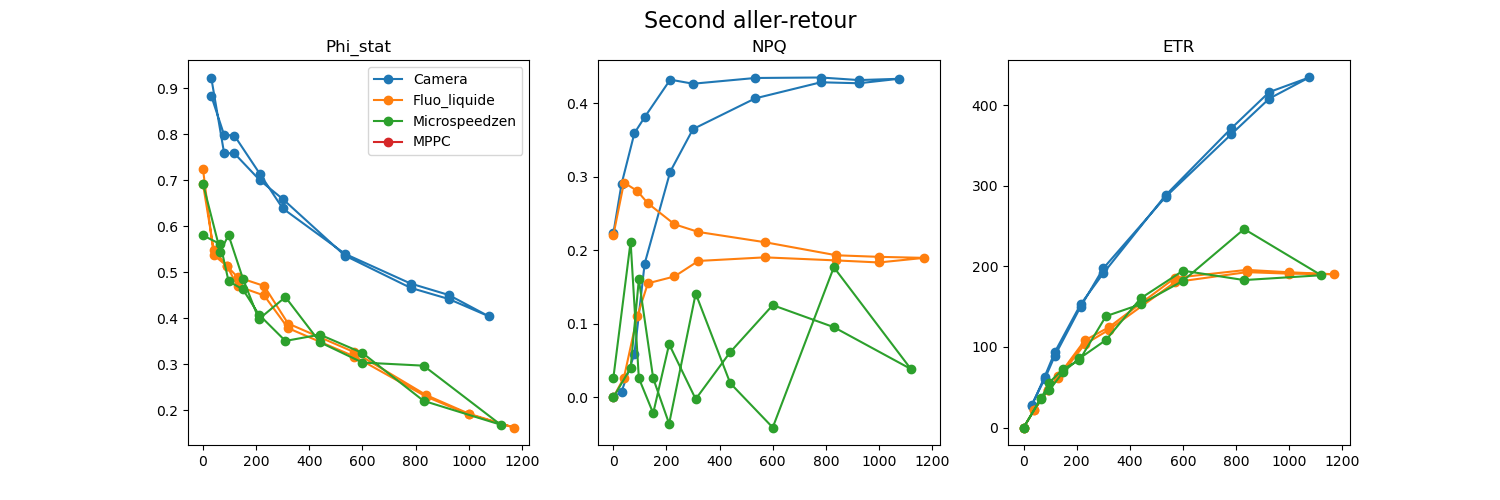

In [6]:
aller_retour = ['3A', '4A']

fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("Second aller-retour", fontsize=16)
for experiment in all_data.keys():
    x = all_data[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].Actinic_intensity
    phi_stat = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].phi_stat
    ETR = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].ETR
    NPQ = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].NPQ
    ax[0].plot(x, phi_stat, 'o-', label=experiment)
    ax[1].plot(x, NPQ, 'o-', label=experiment)
    ax[2].plot(x, ETR, 'o-', label=experiment)

ax[0].set_title("Phi_stat")
ax[1].set_title("NPQ")
ax[2].set_title("ETR")
ax[0].legend()

fig.savefig(f"{fig_folder}params_second_aller_retour.png", dpi = 300)

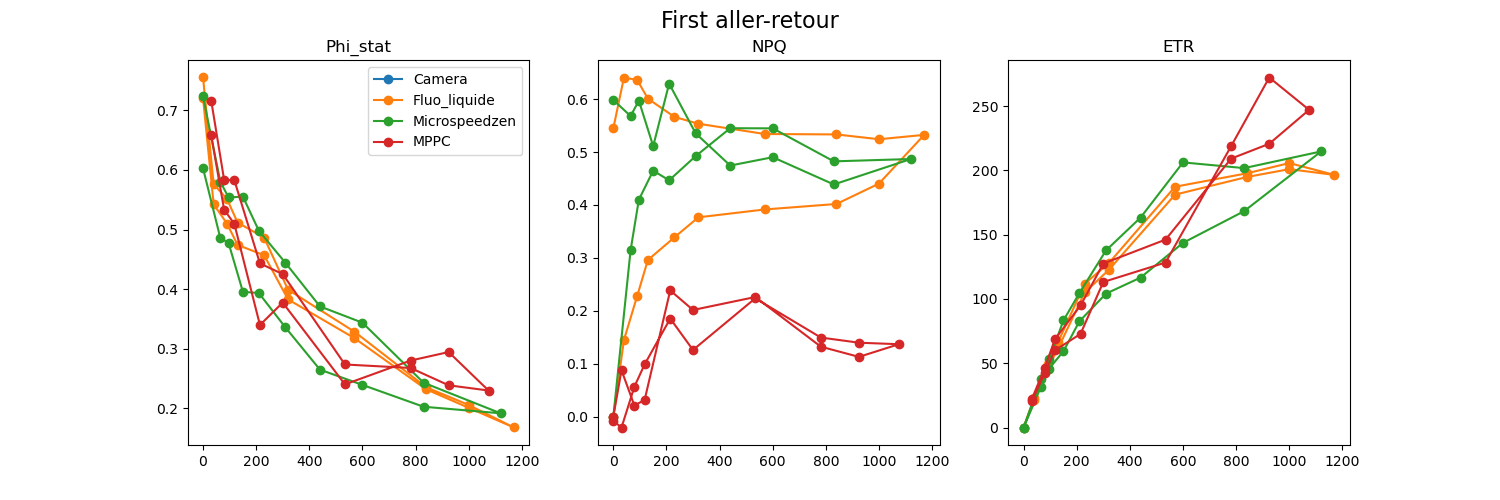

In [7]:
aller_retour = ['1A', '2A']

fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("First aller-retour", fontsize=16)
for experiment in all_data.keys():
    x = all_data[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].Actinic_intensity
    phi_stat = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].phi_stat
    ETR = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].ETR
    NPQ = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].NPQ
    ax[0].plot(x, phi_stat, 'o-', label=experiment)
    ax[1].plot(x, NPQ, 'o-', label=experiment)
    ax[2].plot(x, ETR, 'o-', label=experiment)

ax[0].set_title("Phi_stat")
ax[1].set_title("NPQ")
ax[2].set_title("ETR")
ax[0].legend()

fig.savefig(f"{fig_folder}params_first_aller_retour.png", dpi = 300)

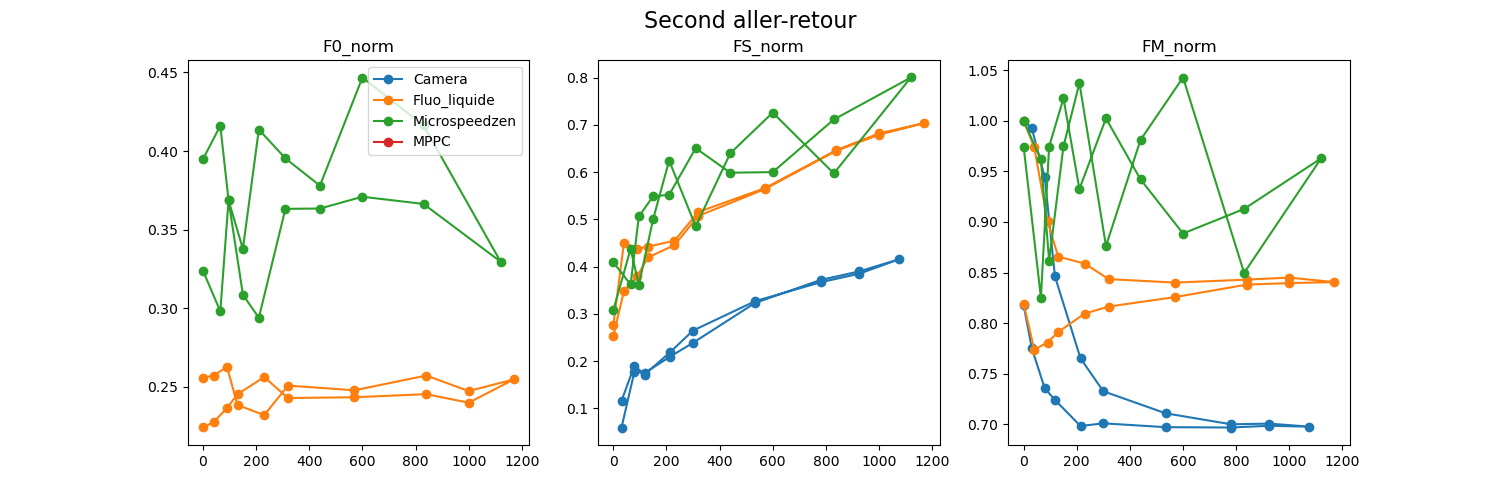

In [9]:
aller_retour = ['3A', '4A']

fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("Second aller-retour", fontsize=16)
for experiment in all_data.keys():
    x = all_data[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].Actinic_intensity
    F0_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].F0_norm
    FS_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FS_norm
    FM_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FM_norm

    ax[0].plot(x, F0_norm, 'o-', label=experiment)
    ax[1].plot(x, FS_norm, 'o-', label=experiment)
    ax[2].plot(x, FM_norm, 'o-', label=experiment)

ax[0].set_title("F0_norm")
ax[1].set_title("FS_norm")
ax[2].set_title("FM_norm")
ax[0].legend()


fig.savefig(f"{fig_folder}fluo_second_aller_retour.png", dpi = 300)

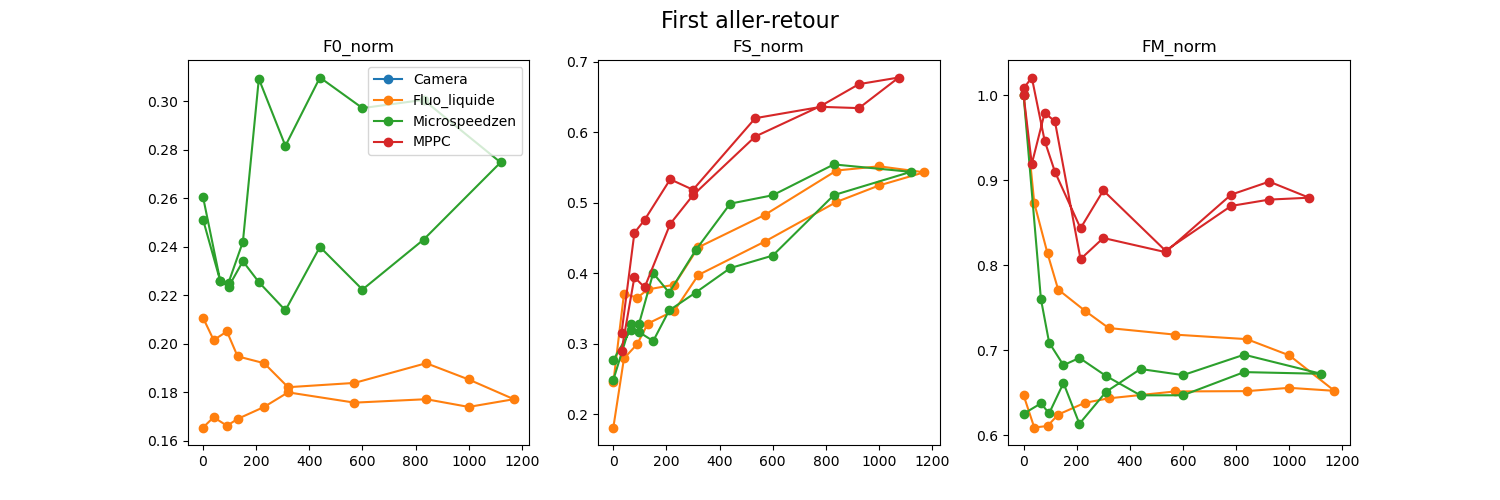

In [10]:
aller_retour = ['1A', '2A']

fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("First aller-retour", fontsize=16)
for experiment in all_data.keys():
    x = all_data[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].Actinic_intensity
    F0_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].F0_norm
    FS_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FS_norm
    FM_norm = test[experiment][(all_data[experiment].Experimental_index == aller_retour[0]) | (all_data[experiment].Experimental_index == aller_retour[1])].FM_norm

    ax[0].plot(x, F0_norm, 'o-', label=experiment)
    ax[1].plot(x, FS_norm, 'o-', label=experiment)
    ax[2].plot(x, FM_norm, 'o-', label=experiment)

ax[0].set_title("F0_norm")
ax[1].set_title("FS_norm")
ax[2].set_title("FM_norm")
ax[0].legend()


fig.savefig(f"{fig_folder}fluo_first_aller_retour.png", dpi = 300)